In [5]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import algorithm
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

# Ensemble Techinque
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


#pickle
import pickle

#ignore warning
import warnings
warnings.filterwarnings("ignore")

# Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [6]:
df = pd.read_csv("data")
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [7]:
df.shape

(1014, 7)

In [8]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
df.duplicated().sum()

562

In [10]:
np.around(df.duplicated().sum()/df.shape[0]*100,2)

55.42

In [11]:
df.nunique().sum()

141

In [12]:
np.around(df.nunique().sum()/df.shape[0]*100,2)

13.91

In [13]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


<function matplotlib.pyplot.show(close=None, block=None)>

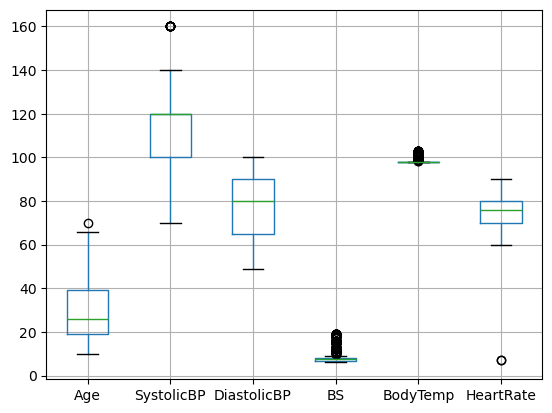

In [14]:
df.boxplot()
plt.show

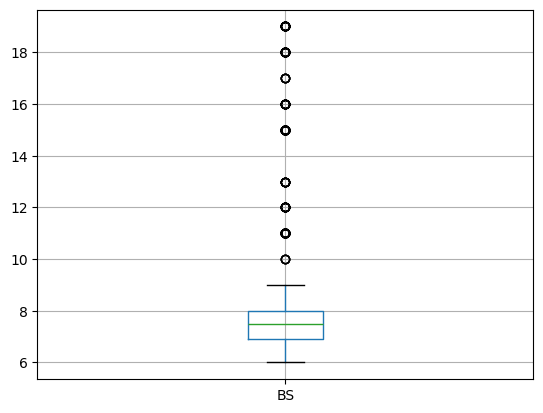

In [15]:
df[["BS"]].boxplot()
plt.show()

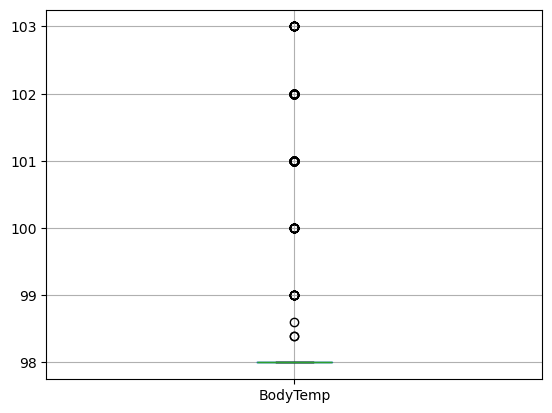

In [16]:
df[["BodyTemp"]].boxplot()
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


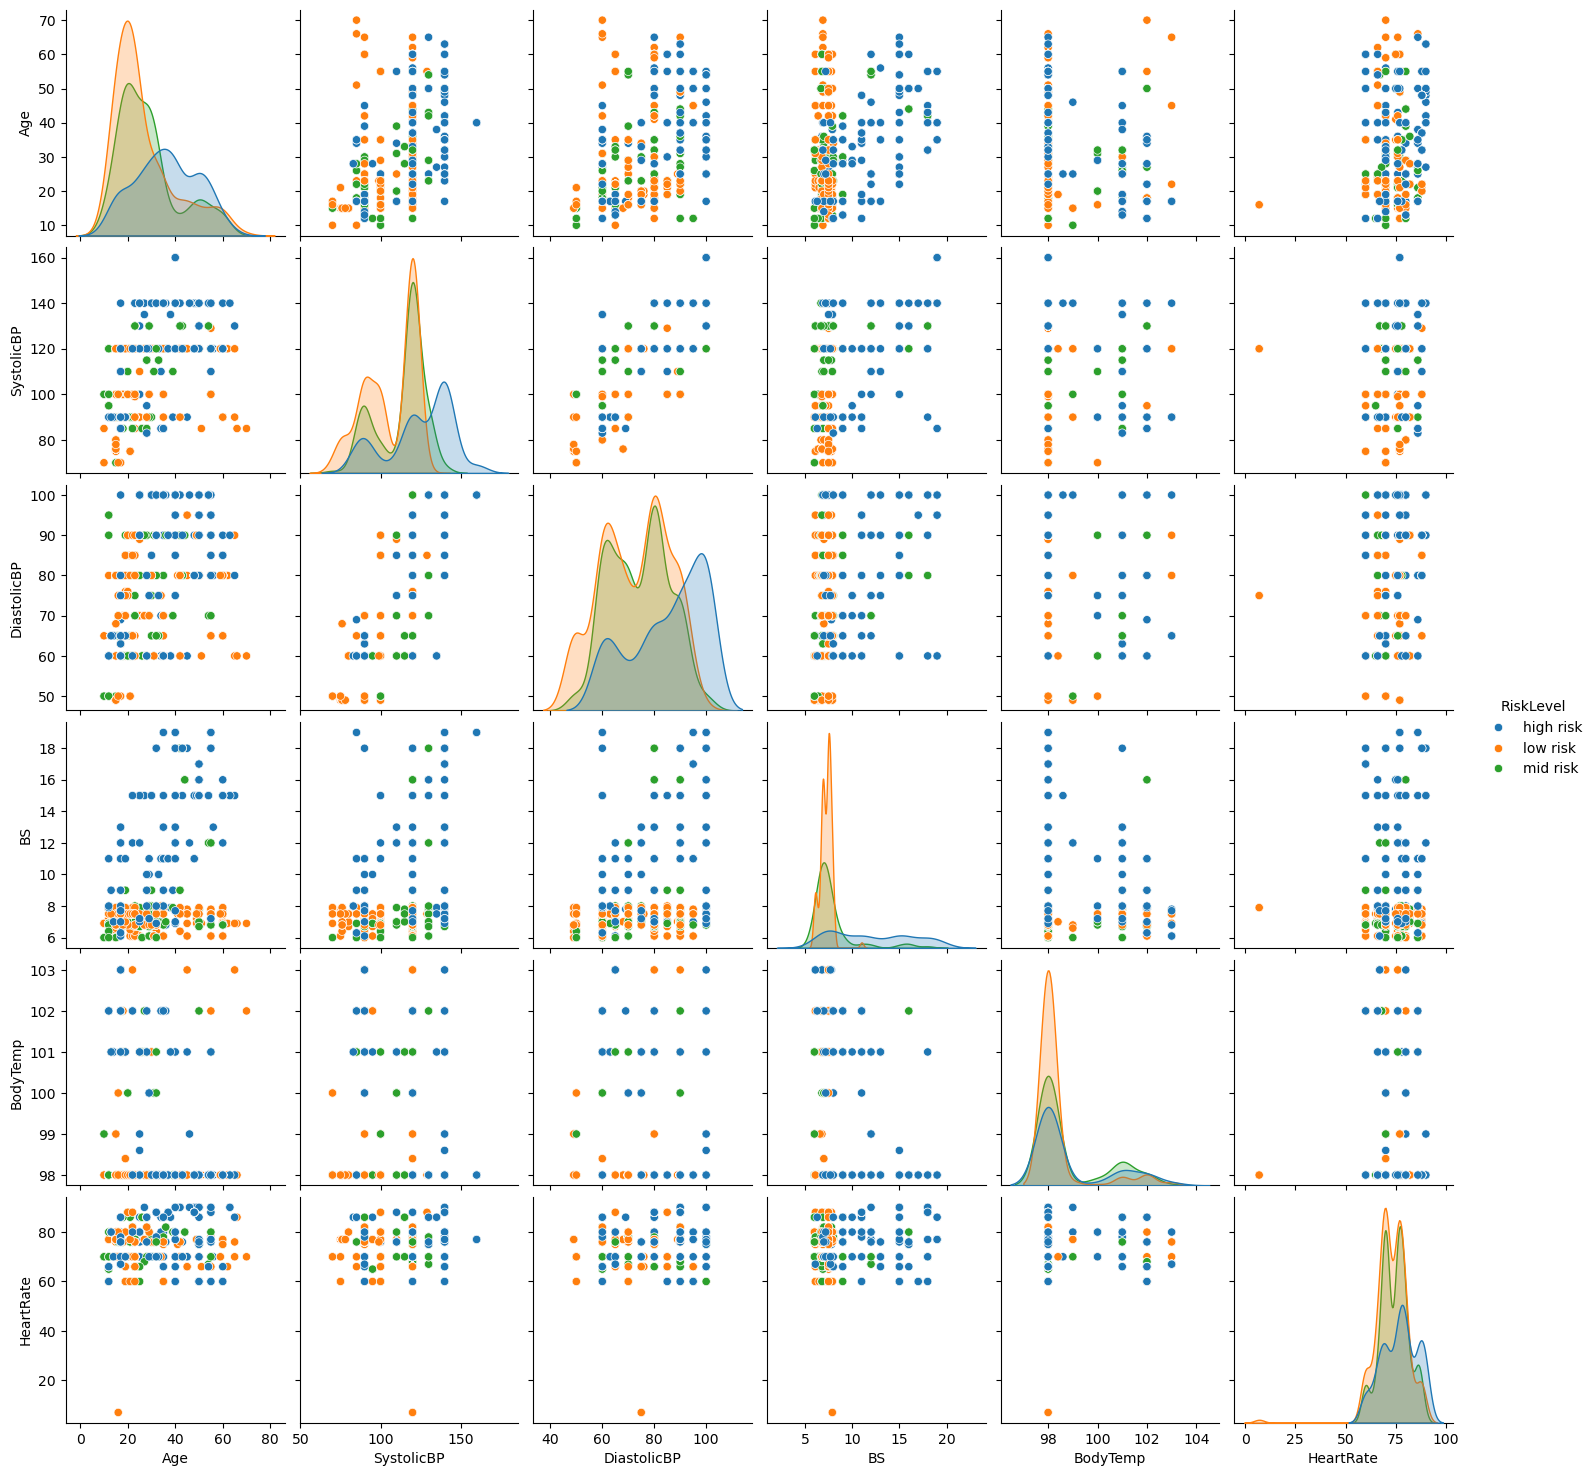

In [18]:
sns.pairplot(df,hue="RiskLevel")
plt.show()

In [19]:
#imbalance data in target

In [20]:
df[["RiskLevel"]].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [21]:
#Encoding

In [22]:
df["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [23]:
df["RiskLevel"].replace({"high risk":1, "low risk":2, "mid risk":3},inplace=True)

In [24]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,2
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,1
1010,55,120,90,18.0,98.0,60,1
1011,35,85,60,19.0,98.0,86,1
1012,43,120,90,18.0,98.0,70,1


In [25]:
df.corr()  #ind vs dep

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,-0.211851
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,-0.208797
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,-0.284633
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,-0.479958
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,-0.006680
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,-0.111637
RiskLevel,-0.211851,-0.208797,-0.284633,-0.479958,-0.006680,-0.111637,1.000000


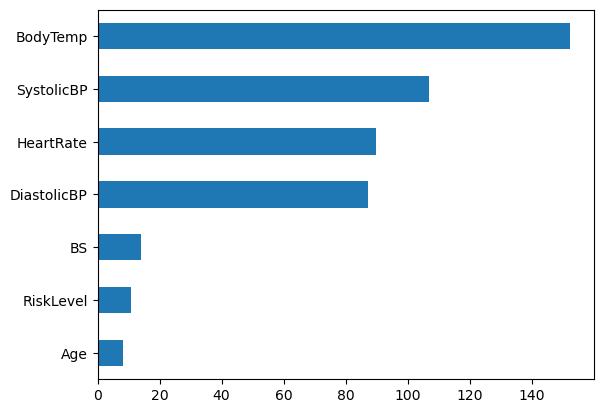

In [26]:
x = df.select_dtypes(exclude="object")    #ind vs ind
vif_list = []
for i in range (x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
y = pd.Series(vif_list,index = x.columns)
y.sort_values().plot(kind="barh")
plt.show()

### Train Test Split

In [27]:
x = df.drop("RiskLevel",axis = 1)
y = df["RiskLevel"]

In [28]:
x

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [29]:
y

0       1
1       1
2       1
3       1
4       2
       ..
1009    1
1010    1
1011    1
1012    1
1013    3
Name: RiskLevel, Length: 1014, dtype: int64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((811, 6), (203, 6), (811,), (203,))

In [32]:
x_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
847,30,120,80,9.0,101.0,76
332,23,130,70,6.9,98.0,70
707,32,120,90,6.9,98.0,70
218,31,120,60,6.1,98.0,76
425,35,100,60,15.0,98.0,80
...,...,...,...,...,...,...
106,50,140,90,15.0,98.0,90
270,22,120,90,7.0,98.0,82
860,17,90,63,6.9,101.0,70
435,65,130,80,15.0,98.0,86


In [33]:
y_train

847    3
332    3
707    3
218    3
425    1
      ..
106    1
270    2
860    3
435    1
102    1
Name: RiskLevel, Length: 811, dtype: int64

### Model Building & Evaluation

#### Random Forest

In [34]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
#Training
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_train,y_pred_train)
print("Accuracy",accuarcy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusion matrix
 [[220   1   4]
 [  4 300  22]
 [  9  12 239]]
Accuracy 0.935881627620222
Classification report
               precision    recall  f1-score   support

           1       0.94      0.98      0.96       225
           2       0.96      0.92      0.94       326
           3       0.90      0.92      0.91       260

    accuracy                           0.94       811
   macro avg       0.93      0.94      0.94       811
weighted avg       0.94      0.94      0.94       811



In [36]:
#Testing
y_pred_test = rf_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion matrix\n",cnf_matrix)

accuarcy = accuracy_score(y_test,y_pred_test)
print("Accuracy",accuarcy)

clf_report = classification_report(y_test,y_pred_test)
print("Classification report\n",clf_report)

Confusion matrix
 [[40  1  6]
 [ 3 60 17]
 [ 3  9 64]]
Accuracy 0.8078817733990148
Classification report
               precision    recall  f1-score   support

           1       0.87      0.85      0.86        47
           2       0.86      0.75      0.80        80
           3       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.82       203
weighted avg       0.81      0.81      0.81       203



#### Adaboost

In [37]:
abd_clf = AdaBoostClassifier()
abd_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [38]:
#Training
y_pred_train = abd_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)

print("Accuarcy\n",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report\n",clf_report)

Confusion Matrix
 [[152  10  63]
 [  9 231  86]
 [ 22  70 168]]
Accuarcy
 0.6794081381011098
Classification Report
               precision    recall  f1-score   support

           1       0.83      0.68      0.75       225
           2       0.74      0.71      0.73       326
           3       0.53      0.65      0.58       260

    accuracy                           0.68       811
   macro avg       0.70      0.68      0.68       811
weighted avg       0.70      0.68      0.68       811



In [39]:
#Testing
y_pred = abd_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)

print("Accuarcy\n",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classification Report\n",clf_report)


Confusion Matrix
 [[31  3 13]
 [ 2 58 20]
 [ 5 19 52]]
Accuarcy
 0.6945812807881774
Classification Report
               precision    recall  f1-score   support

           1       0.82      0.66      0.73        47
           2       0.72      0.72      0.72        80
           3       0.61      0.68      0.65        76

    accuracy                           0.69       203
   macro avg       0.72      0.69      0.70       203
weighted avg       0.70      0.69      0.70       203



#### SVM

In [40]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [41]:
#Training
y_pred = svc_model.predict(x_train)
accuracy = accuracy_score(y_train,y_pred)
print("Accuarcy",accuracy)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("Confustion matrix\n",cnf_matrix)

clf_report = classification_report(y_train,y_pred)
print("Classification report\n",clf_report)

Accuarcy 0.5955610357583231
Confustion matrix
 [[115  76  34]
 [  0 300  26]
 [  7 185  68]]
Classification report
               precision    recall  f1-score   support

           1       0.94      0.51      0.66       225
           2       0.53      0.92      0.68       326
           3       0.53      0.26      0.35       260

    accuracy                           0.60       811
   macro avg       0.67      0.56      0.56       811
weighted avg       0.65      0.60      0.57       811



In [42]:
#Testing
y_pred = svc_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuarcy",accuracy)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confustion matrix\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print("Classification report\n",clf_report)

Accuarcy 0.5960591133004927
Confustion matrix
 [[28 12  7]
 [ 1 74  5]
 [ 2 55 19]]
Classification report
               precision    recall  f1-score   support

           1       0.90      0.60      0.72        47
           2       0.52      0.93      0.67        80
           3       0.61      0.25      0.36        76

    accuracy                           0.60       203
   macro avg       0.68      0.59      0.58       203
weighted avg       0.65      0.60      0.56       203



#### Logistic Regression

In [43]:
lg_regression = LogisticRegression()
lg_regression.fit(x_train,y_train)

LogisticRegression()

In [44]:
# Training
y_pred_train = lg_regression.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)

print("Confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuarcy\n",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification report\n",clf_report)


Confusion matrix
 [[149  48  28]
 [  8 267  51]
 [ 25 166  69]]
accuarcy
 0.5980271270036991
classification report
               precision    recall  f1-score   support

           1       0.82      0.66      0.73       225
           2       0.56      0.82      0.66       326
           3       0.47      0.27      0.34       260

    accuracy                           0.60       811
   macro avg       0.61      0.58      0.58       811
weighted avg       0.60      0.60      0.58       811



In [45]:
# Testing
y_pred = lg_regression.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)

print("Confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("accuarcy\n",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification report\n",clf_report)


Confusion matrix
 [[34 11  2]
 [ 1 72  7]
 [ 7 47 22]]
accuarcy
 0.6305418719211823
classification report
               precision    recall  f1-score   support

           1       0.81      0.72      0.76        47
           2       0.55      0.90      0.69        80
           3       0.71      0.29      0.41        76

    accuracy                           0.63       203
   macro avg       0.69      0.64      0.62       203
weighted avg       0.67      0.63      0.60       203



In [46]:
#we get the  best accuracy using the Random Forest model

### User Input

In [47]:
x.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')

In [48]:
df.iloc[0]

Age             25.0
SystolicBP     130.0
DiastolicBP     80.0
BS              15.0
BodyTemp        98.0
HeartRate       86.0
RiskLevel        1.0
Name: 0, dtype: float64

In [49]:
encoded_columns = {"columns" : list(x.columns)}
encoded_columns

{'columns': ['Age',
  'SystolicBP',
  'DiastolicBP',
  'BS',
  'BodyTemp',
  'HeartRate']}

In [50]:
import json
with open("label_encoded_columns.json","w") as f:
    json.dump(encoded_columns,f)

In [51]:
Age        =   25.0
SystolicBP =   130.0
DiastolicBP =  80.0
BS          =  15.0
BodyTemp    =  98.0
HeartRate   =  86.0

In [52]:
columns_names = x.columns
array = np.zeros(len(x.columns),dtype=int)
array[0] = Age             
array[1] = SystolicBP     
array[2] = DiastolicBP     
array[3] = BS              
array[4] = BodyTemp        
array[5] = HeartRate           

In [53]:
array

array([ 25, 130,  80,  15,  98,  86])

In [54]:
print("Input shape:", len(array))

Input shape: 6


In [55]:

predicted_Risk = np.around(rf_model.predict([array])[0], 2) 

if predicted_Risk == 1:
    print("Predicted Maternal Health Risk is High ")
elif predicted_Risk == 2:
    print("Predicted Maternal Health Risk is Low ")
elif predicted_Risk == 3:
    print("Predicted Maternal Health Risk is Medium ")
else:
    print("Invalid risk value")


Predicted Maternal Health Risk is High 


In [56]:
with open("rf_model2.pkl","wb") as f:
    pickle.dump(rf_model,f)